<a href="https://colab.research.google.com/github/TylerRobichaux/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module3-join-and-reshape-data/LS_DS_113_Join_and_Reshape_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 3*

---

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [1]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2020-05-07 13:27:22--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.106.246
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.106.246|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  64.6MB/s    in 3.0s    

2020-05-07 13:27:25 (64.6 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [2]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [3]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [4]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


# Assignment

## Join Data Practice

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

In [5]:
##### YOUR CODE HERE #####
import pandas as pd
products = pd.read_csv('products.csv')
orders = pd.read_csv('orders.csv')
order_products__prior = pd.read_csv('order_products__prior.csv')
order_products__train = pd.read_csv('order_products__train.csv')


order_products = pd.concat([order_products__prior, order_products__train])
order_products.head()



,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [6]:
orders_and_products = orders_and_products = pd.merge(orders, order_products, on='order_id', how='inner')
orders_and_products.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,NaN,196,1,0
1,2539329,1,prior,1,2,8,NaN,14084,2,0
2,2539329,1,prior,1,2,8,NaN,12427,3,0
3,2539329,1,prior,1,2,8,NaN,26088,4,0
4,2539329,1,prior,1,2,8,NaN,26405,5,0


In [0]:
df_all_data = pd.merge(orders_and_products, products, on='product_id')


In [8]:
df_all_data.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7
1,2398795,1,prior,2,3,7,15.0,196,1,1,Soda,77,7
2,473747,1,prior,3,3,12,21.0,196,1,1,Soda,77,7
3,2254736,1,prior,4,4,7,29.0,196,1,1,Soda,77,7
4,431534,1,prior,5,4,15,28.0,196,1,1,Soda,77,7


In [9]:
df_all_data['product_name'].value_counts().head(10)

Banana                    491291
Bag of Organic Bananas    394930
Organic Strawberries      275577
Organic Baby Spinach      251705
Organic Hass Avocado      220877
Organic Avocado           184224
Large Lemon               160792
Strawberries              149445
Limes                     146660
Organic Whole Milk        142813
Name: product_name, dtype: int64

## Reshape Data Section

- Replicate the lesson code. Remember, if you haven't followed along typing out what we did during lecture, do that now to get more repetition with the syntax.
- Take table 2 (the transpose of table 1) and practice changing it into Tidy format and back again. You should not use the transpose operation anywhere in this code:
 - Table 2 --> Tidy
 - Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [10]:
import pandas as pd
import numpy as np

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [11]:
# table2 -> tidy
table1 = table1.reset_index()
print(table1)
tidy = table1.melt(id_vars='index', value_vars=['treatmenta', 'treatmentb'])
tidy.head(10)
#if I am being honest, i didnt expect this to work

          index  treatmenta  treatmentb
0    John Smith         NaN           2
1      Jane Doe        16.0          11
2  Mary Johnson         3.0           1


,index,variable,value
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [12]:
# tidy -> table2
tidy.pivot_table(index = 'index', columns='variable', values='value')

variable,treatmenta,treatmentb
index,,
Jane Doe,16.0,11.0
John Smith,NaN,2.0
Mary Johnson,3.0,1.0


In [13]:
import seaborn as sns
flights = sns.load_dataset('flights')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [14]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [15]:
# Flights Pivot Table
flights_pivoted = flights.pivot_table(index = 'year', columns='month', values='passengers')
flights_pivoted.head(10)

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.



In [0]:
##### YOUR CODE HERE #####

#ugh fine, ill cheat and type out the product names....
product_names = ['Half Baked Frozen Yogurt', 'Milk and Cookies Ice Cream',
                 'Sicilian Pistachio', 'Chocolate peanut Butter Cup Gelato', 
                 'Birthday Cake Light Ice Cream', 'Strawberry Ice Cream',
                  'Vanilla Bean Light Ice Cream', 'Coffee Ice Cream',
                 'Roam Rasberry Sorbetto', 'Mediterranean Mint Gelato', 
                 'Caramel Chip Cookie Crunch Gelato', 'Chocolate Chip Cookie Dough Ice Cream',
                 'Mint Chip', 'Coconut almond Minis Frozen Dessert Bars', 
                 'Sea Salt Caramel Gelato', 'Cherry Garcia Ice Cream', 'Mint Chocolate Chip Ice Cream',
                 'Chocolate Peanut Butter Ice Cream', 'Vanilla Milk Chocolate Almond Ice Cream Bars',
                 'Rising Crust Pepperoni Pizza']

condition = df_all_data['product_name'].isin(product_names)
subset = df_all_data[condition]


In [0]:

froyo = subset[subset['product_name']=='Half Baked Frozen Yogurt']
mlk_n_cookies = subset[subset['product_name']=='Milk and Cookies Ice Cream']
sic_pis = subset[subset['product_name']=='Sicilian Pistachio']
choc_pb = subset[subset['product_name']=='Chocolate peanut Butter Cup Gelato']
bday = subset[subset['product_name']=='Birthday Cake Light Ice Cream']
staw = subset[subset['product_name']=='Strawberry Ice Cream']
van_bean = subset[subset['product_name']=='Vanilla Bean Light Ice Cream']
coff = subset[subset['product_name']=='Coffee Ice Cream']
roam_r = subset[subset['product_name']=='Roam Rasberry Sorbetto']
med_mint = subset[subset['product_name']=='Mediterranean Mint Gelato']
carm_chip = subset[subset['product_name']=='Caramel Chip Cookie Crunch Gelato']
choc_chip = subset[subset['product_name']=='Chocolate Chip Cookie Dough Ice Cream']
mint = subset[subset['product_name']=='Mint Chip']
coc_alm = subset[subset['product_name']=='Coconut almond Minis Frozen Dessert Bars']
sea_salt = subset[subset['product_name']=='Sea Salt Caramel Gelato']

In [0]:
wide = pd.crosstab(subset['order_hour_of_day'], 
                    subset['product_name'], 
                    normalize=True)
melted = wide.reset_index().melt(id_vars='order_hour_of_day')



melted = melted.rename(columns={
     'order_hour_of_day': 'Hour of Day Ordered', 
     'product_name': 'Product', 
     'value': 'Percent of Orders by Product'
 })


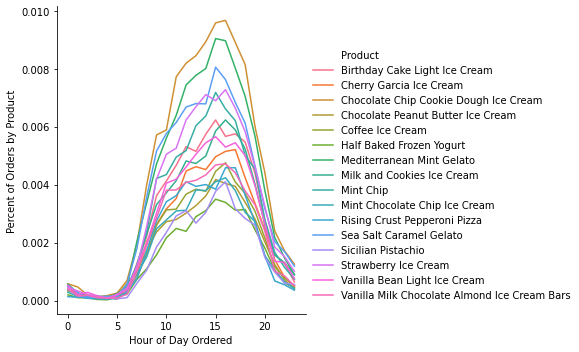

In [19]:
sns.relplot(x='Hour of Day Ordered', y='Percent of Orders by Product', hue='Product', data=melted, kind='line');

## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [0]:
df_small = df_all_data[['days_since_prior_order', 'user_id', 'order_id', 'product_name']].copy()
#just geting rid of extra information

In [0]:

#my attempts to get all customers last order, Ill type what each line is supposed to do
def most_recent_order(customer):
  customers_orders_mask = df_small['user_id'] == 3 #this value represents the user_id. what ever number you put it will retrieve their last order
  customers_orders = df_small[customers_orders_mask]
  min_value = customers_orders['days_since_prior_order'].min()
  bool_df = customers_orders['days_since_prior_order'] == min_value
  return customers_orders[bool_df]

#see it works below

In [39]:
#you can manualy change the value at the end of the 2nd row
customers_orders_mask = df_small['user_id'] == 3 #this value represents the user_id. what ever number you put it will retrieve their last order
customers_orders = df_small[customers_orders_mask]
min_value = customers_orders['days_since_prior_order'].min()
bool_df = customers_orders['days_since_prior_order'] == min_value
customers_orders[bool_df]
# i jsut cant get it to work with .apply()

,days_since_prior_order,user_id,order_id,product_name
862312,7.0,3,1972919,Organic Avocado
862313,7.0,3,3225766,Organic Avocado
862314,7.0,3,3160850,Organic Avocado
1423562,7.0,3,1839752,Strawberries
1423563,7.0,3,3160850,Strawberries
3295818,7.0,3,1972919,Granny Smith Apples
3295819,7.0,3,1839752,Granny Smith Apples
3413374,7.0,3,3225766,Birthday Cake Light Ice Cream
3413375,7.0,3,3160850,Birthday Cake Light Ice Cream
3440171,7.0,3,1972919,Vanilla Unsweetened Almond Milk


In [0]:

#df_small['user_id'].apply(most_recent_order)

#I surrender. I cant get it to work with .apply() so im going to cheat and use a for loop

In [0]:
df_user_unique_ids = df_small['user_id'].unique()
for unique_id in df_user_unique_ids:
  print(most_recent_order(unique_id))

Streaming output truncated to the last 5000 lines.
4194628                     7.0  ...  All Natural No Stir Creamy Almond Butter
4194629                     7.0  ...  All Natural No Stir Creamy Almond Butter
4221524                     7.0  ...                 Wheat Gluten Free Waffles
4228340                     7.0  ...               Organic Whole String Cheese
4228341                     7.0  ...               Organic Whole String Cheese
4389543                     7.0  ...                          Brussels Sprouts
4412966                     7.0  ...                               Green Beans
4412967                     7.0  ...                               Green Beans
4443195                     7.0  ...         Organic Peeled Whole Baby Carrots
4443196                     7.0  ...         Organic Peeled Whole Baby Carrots
4443197                     7.0  ...         Organic Peeled Whole Baby Carrots
4501026                     7.0  ...                           Garlic Couscous
4